# Bob Ghosh, j0k0b, 42039157

# Assignment 5, CPSC 406, April 8

## Late Days

Submitted on April 11. Late Days Used: 2.

## Collaborations

Shikhar Nandi: 51931153

## Libraries

In [1]:
using LinearAlgebra, Statistics, Random, Plots, GLPK, Convex

## Question 1: Conversion To Standard Form

### a

Let us firstly state that $ \forall b_{i} \leq 0$, $A_{i}x = b_{i}$ for $i$ rows. We can now multiply the rows of matrix A with -1, which leads us to a new matrix $\hat{A}$, such that, $\hat{A} = -A$. $\therefore \hat{A}x = -b$. Hence, we can get a new vector $\hat{b}$ such that $\hat{b} \geq 0$. And, thus finally, we can say that given the contraint we have found $\hat{A}x = \hat{b}$ such that $\hat{b}\geq 0$.

### b

To derive this let us define $x_{1}-x_{2} = x$ such that $x_{1}, x_{2} \geq 0$. So based on the equation, we attain the inequality $C(x_{1}-x_{2}) \leq d$. Which can be written as $Cx_{1} \leq d + Cx_{2}$.<br>

Let us now introduce a slack variable s such that $s \geq 0$. We can introduce the slack as $Cx_{1} + s = d + Cx_{2}$, which changes the inequality to equality.<br>

Now we can define $\hat{C} = (C I)$ where $I$ is an Identity Matrix. Then, we can derive $\hat{z} = \left({\begin{array}{cc} X_1 \\ S \end{array}}\right)$. And, finally, $\hat{d} = d + Cx_{2}$. Hence we have arrived at the expected equation, $\hat{C}\hat{z}=\hat{d}$, where, by the way we defined it, $\hat{z} \geq 0$. 

### c

We will use both <B>a</B> and <B>b</B> to derive <B>c</B>. <br>
First step is to reconfigure the equation $\hat{A}x = \hat{b}$ into $\hat{A}(x_{1}-x_{2}) = \hat{b}$ [From Above]. After arranging we get $\hat{A}x_{1} = \hat{A}x_{2}\hat{b}$. <br>
In the equation above, we can set $b' = \hat{A}x_{2}\hat{b}$ to get $\hat{A}x_{1} = b'$.

Using from above $\hat{C}\hat{z}=\hat{d}$, we can find $\tilde{A}, \tilde{b}$ and $z$ as: <br>
$\tilde{A} = \pmatrix{\hat{A} && 0 \\ 0 && \hat{C}}$,
$\tilde{b} = \pmatrix{b' \\ \hat{d}}$,
$z = \pmatrix{X_1 \\ \hat{Z}}$.

## Question 2

### a

$\begin{array}{ll}
\min_{x_1,x_2} & -2x_1 - x_2
\\ \mathrm{subject \ \ to}    & \begin{aligned}[t]
            \phantom{-2}x_1 - x_2 &\le 2
        \\ x_1 + x_2 &\le 6
        \\ x_1,  x_2 &\ge 0.
        \end{aligned}
\end{array}$

To convert the above to a standard form, we need to change the inequalities to equations, and for that we need to introduce slack variables. So, let us define two slack variables as $s_{1}$ and $s_{2}$. We get the following equation based on the slack variables: <br>
$\begin{array}{ll}
\min_{x_1,x_2} & \ \ -2x_1 - x_2
\\ \mathrm{subject \ \ to}    & \begin{aligned}[t]
            \phantom{-2}x_1 - x_2 + s_{1} &= 2
        \\ x_1 + x_2 + s_2 &= 6
        \\ x_1,  x_2, s_1, s_2 &\ge 0.
        \end{aligned}
\end{array}$


When we put $x_1 = 0$ and $x_2 = 0$, we get $s_1 = 2$ and $s_2 = 6$. Putting these slack values, we will get a feasible solution.

### b

#### Iteration 1

$N = \pmatrix{1 & -1 \\ 1 & 1}$,
$B = \pmatrix{1 & 0 \\ 0 & 1}$,
$b = \pmatrix{2 \\ 6}$,
$C_N = (-2 \ \ -1)$,
$C_B = (0 \ \ 0)$


We further need some more variables. <br>
Now in order to solve $Bx_b = b$, we need $X_b = \pmatrix{4 \\ 2}$.

In order to solve $B^Ty = C_B$, we need $y = (-0.2 \ \ -0.6)$.

Finally we calculate $Z_n = (x_1: -2 \ \ x_2: -1)$. For minimization, we pick up the smaller value to enter, and in this case, that would be $x_1$. 

---------------------------------------------------------------------------

Once we have done selecting what variable to enter, we can calculate the rest. <br>
We start by solving $Bd = -A_1$, where $d = \pmatrix{-1 \\ -1}$.

Ratio Test: <br>
$\mathrm{argmin} \frac{-X_b}{d_q} = \mathrm{argmin} (\frac{2}{1},\frac{6}{1}) = 2$.<br>
$\therefore s_1$ leaves the basis. 

#### Iteration 2

$N = \pmatrix{1 & 0 \\ 0 & 1}$,
$B = \pmatrix{1 & -1 \\ 1 & 1}$,
$b = \pmatrix{2 \\ 6}$,
$C_N = \pmatrix{0 & 0}$,
$C_B = \pmatrix{-2 & -1}$

We further need some more variables. <br>
Now in order to solve $Bx_b = b$, we need $X_b = \pmatrix{4 \\ 2}$. <br>
In order to solve $B^Ty = C_B$, we need $y = (-0.2 \ \ -0.6)$.<br>
Finally we calculate $Z_n = (x_1: 0.2 \ \ x_2: 0.6)$. For minimization, we pick up the smaller value to enter, and in this case, that would be $x_1$. 

-------------------------------------------------------------------------------

We see that all values of $Z_n \geq 0$. We have found a minimum positive cost, i.e., an optimal basis. Hence, for the optimal basis the values are: <br>
$x_1 = 4, x_2 = 2, s_1 = 0 \ \mathrm{and} \ s_2 = 0$

## Question 3: Robust Optimization

### a

(4) says that  we need to $\underset{x}{\mathrm{minimize}}\ \ ||Ax-b||_1 = \underset{k}\sum{|a_k^Tx-b_k}|$, which is a L1-Norm.

We know that $A \in R^{m \times n}$ and $b \in R^m$. If we assume that $x$ is fixed, then we can alter the function as: <br>
$\begin{array}{ll}
\min_y &  \   \ \phantom{A}1^Ty
\\ \mathrm{subject \ \ to}    & \begin{aligned}[t]
        \ \  Ax-b &\leq y
        \\ -Ax+b &\leq y
        \end{aligned}
\end{array}$

where $x \in R^n$ and $y \in R^m$ and optimal value would be $-y_k \leq a_k^Tx-b_k \leq y_k$.

Before proceeding further we must introduce a new variable $z$, where $z = \{x;  y\}$ of size $n+m$ which has $x$ as first $n$ variables, and $y$ as the remaining $m$. <br>
Now we can introduce a vector $c$ of size $n+m$,  where the  first $n$ entries are 0s and the last $m$ entries are 1s. Furthermore, we can refactor the terms $Ax-b  \leq y$ into $Az-z \leq b$, and $-Ax+b \leq y$ into $-Az-z \leq -b$.  Which give us the following LP problem: 

$\begin{array}{ll}
\min_z &  \   \ \phantom{A}c^Tz
\\ \mathrm{subject \ \ to}    & \begin{aligned}[t]
        \ \  Az-z &\leq b
        \\ -Az-z &\leq -b
        \end{aligned}
\end{array}$

Finally, we can define $\hat{A} = \{A-I;  -A-I\}$, and so  $Az-z$ can be written as $\hat{A}z$. Similarly, we can define $\hat{b}$ as $\hat{b} = \{b; -b\}$. Thus, the LP now becomes:

$\begin{array}{ll}
\min_z &  \   \ \phantom{A}c^Tz
\\ \mathrm{subject \ \ to}    & \begin{aligned}[t]
        \ \  \hat{A}z &\leq \hat{b}
        \end{aligned}
\end{array}$

### b

(5) says that  we need to $\underset{x}{\mathrm{minimize}}\ \ ||Ax-b||_{\infty} = \underset{k}\max{|a_k^Tx-b_k}|$, which is a L$\infty$-Norm.

Similarly to the last one we can change the problem into a LP, having known that $A \in R^{m \times n}$ and $b \in R^m$, as:

$\begin{array}{ll}
\min_y &  \   \ \phantom{A}y
\\ \mathrm{subject \ \ to}    & \begin{aligned}[t]
        \ \  Ax-b &\leq y_{m}
        \\ Ax-b &\geq -y_{m}
        \end{aligned}
\end{array}$

where $x \in R^n$ and $y \in R$ and optimal value would be $-y \leq a_k^Tx-b_k \leq y$.

Before proceeding further we must introduce a new variable $z$, where $z = \{x; y\}$ of size $n+1$ which has $x$ as the first $n$ variables and $y$ as the last one. <br>
Now we can introduce a vector $c$ of size $n+m$ where the first $n$ entries are 0s and the last $m$ entries are 1s. Furthermore, we can refactor the terms $Ax-b \leq b$ as $Ax-z \leq b$ and $Ax-b \leq -y$ as $-Ax-z \leq -b$. Which give us the following LP problem: 

$\begin{array}{ll}
\min_z &  \   \ \phantom{A}c^Tz
\\ \mathrm{subject \ \ to}    & \begin{aligned}[t]
        \ \  Az-z &\leq b
        \\ -Az-z &\leq -b
        \end{aligned}
\end{array}$

Finally, we can define $\hat{A} = \{A - J_{1,m}; - A - J_{1,m}\}$, and so $Az-z$ can be written as $\hat{A}z$. Similarly, we can define $\hat{b}$ as $\hat{b} = \{b; -b\}$.. Thus, the LP now becomes:

$\begin{array}{ll}
\min_z &  \   \ \phantom{A}c^Tz
\\ \mathrm{subject \ \ to}    & \begin{aligned}[t]
        \ \  \hat{A}z &\leq \hat{b}
        \end{aligned}
\end{array}$

### c

In [2]:
# Setting Everything Up

Random.seed!(1)
m = 400
n = 200
A = randn(m,n)
b = randn(m);

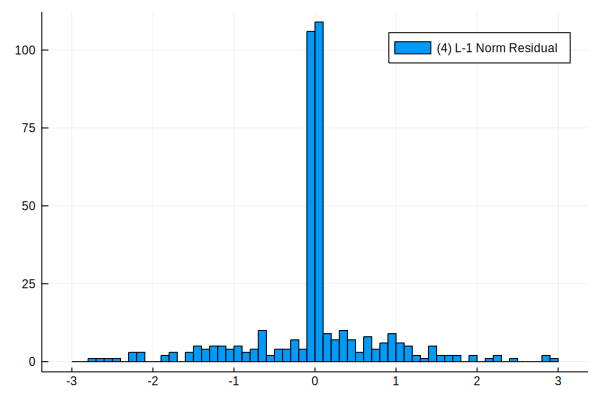

In [3]:
# (4): 1-Norm

z = Variable(n + m);
c = [zeros(n);ones(m)];
Ahat = [A -I;-A -I];
bhat = [b; -b];

problem = minimize(transpose(c)*z, [Ahat*z <= bhat]) 

solve!(problem, GLPK.Optimizer)

res_l1 = A*z.value[1:n]-b

# histogram plot
histogram(res_l1, bins=-3:.1:3, label = "(4) L-1 Norm Residual")

With what we get for L1-Norm, we can deduce that at the absolute centre, 0 in the case above, the values are high. But, as the spread increases, i.e., as we move away from the absolute centre we see that values are relatively lower. 

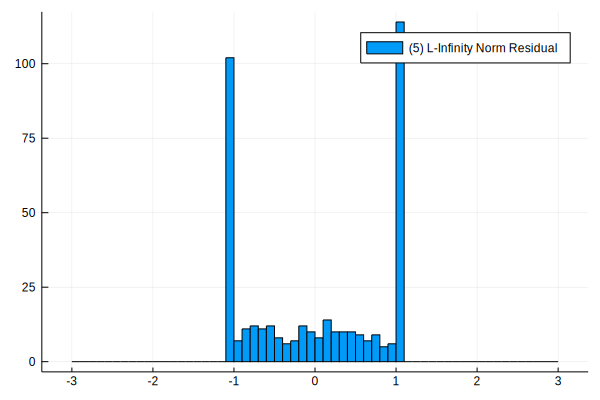

In [4]:
# (5): Infinity-Norm 

z = Variable(n+1);
c = [zeros(n);1];
col = [zeros(m-1);1]
Ahat2 = [A -ones(m);-A -ones(m)];
bhat2 = [b; -b];

problem = minimize(transpose(c)*z, [Ahat2*z <= bhat2])


solve!(problem, GLPK.Optimizer)
res_inf = A*z.value[1:n]-b;

# histogram plot
histogram(res_inf, bins=-3:.1:3, label = "(5) L-Infinity Norm Residual")

In the graph above for the Infinity Norm, we see that error values are high around -1 and 1, and relatively low at the centre. So for most values, on average, the error is low, while at the end points, the error is skewed extremely high. This could be seen as the obverse of the L1-Norm. Moreover, we can see that the error is contained between around -1 to around 1.

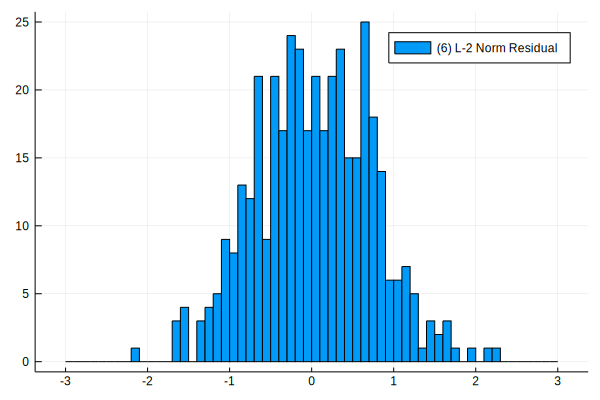

In [5]:
# (6): 2-Norm
x_ls = A\b;

# residual
res_ls = A*x_ls-b;

# histogram plot
histogram(res_ls,bins=-3:.1:3, label = "(6) L-2 Norm Residual")

For the L2-Norm we see a very normal-like distribution of error. This is very standard as per our expectations for a L2-Norm, and it is supposed to have an evenly distributed error.

### d

Based on the histograms we saw above, we should choose the L-Infinity Norm because the error is contained between -1 and 1. So it is more accurate and will be easy to predict, thus making it appropriate for a situation where we need to ensure that not a single patient meet their terrible fate.

### e

The best norm for this situation would be to use the L-1 Norm. The main reason behind this decision would be that the high value of error is mainly centred at 0, the absolute centre. Remaining portion of the graph has relatively lower error, which makes it a perfect candidate for maximizing as many market segments as possible.